In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max, canny

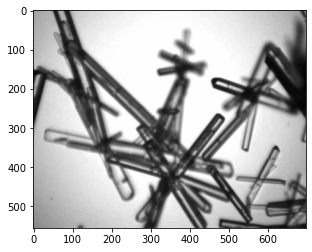

In [8]:
img = cv2.imread('TestPR46.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

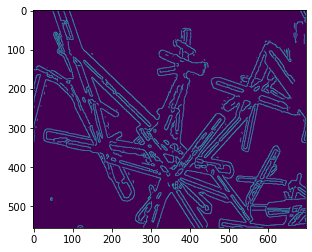

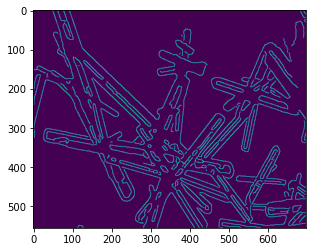

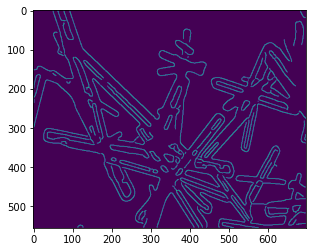

In [3]:
edge1 = canny(img)
edge2 = canny(img,2)
edge3 = canny(img,3)

edge = [edge1, edge2, edge3]

for el in edge:
    plt.figure()
    plt.imshow(el)

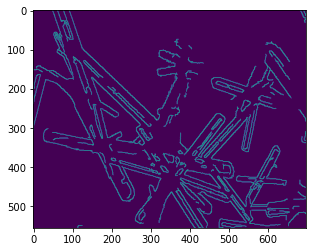

In [4]:
edge_cv = cv2.Canny(img,100,200)
plt.imshow(edge_cv)

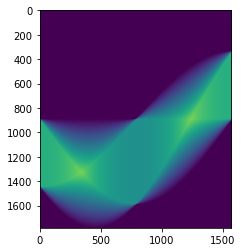

In [5]:
X , Y = edge2.shape
ang_sampling = 0.002

rho_max = np.hypot(X,Y)
rho = np.arange(-rho_max, rho_max, 1)

theta = np.arange(0, np.pi, ang_sampling)
sin_theta, cos_theta = np.sin(theta), np.cos(theta)

H = np.zeros((rho.size, theta.size))

for i in range(X):
    for j in range(Y):
        if img[i,j] != 0:
            R = i*cos_theta + j*sin_theta
            R = np.round(R+(rho.size/2)).astype(int)
            H[R, range(theta.size)] += 1
                
plt.imshow(H)

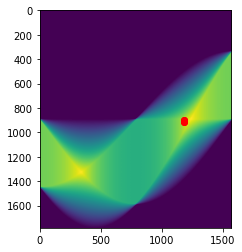

In [6]:
plt.figure()

G = cv2.GaussianBlur(H, (5,5), 5)
maxima = peak_local_max(H, 5, threshold_abs=150, num_peaks=5)

plt.scatter(maxima[:,1], maxima[:,0], c='r')
plt.imshow(G)

4.184643149883755 2.356
16.184643149883755 2.356
21.184643149883755 2.356
11.184643149883755 2.356
23.184643149883755 2.356


ValueError: array([[  0,   0,   0, ..., 129, 126, 112],
       [  0,   0,   0, ..., 131, 122, 111],
       [  0,   0,   0, ..., 127, 124, 118],
       ...,
       [144, 145, 144, ...,  34,  33,  33],
       [145, 146, 145, ...,  32,  31,  30],
       [145, 146, 144, ...,  37,  33,  31]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

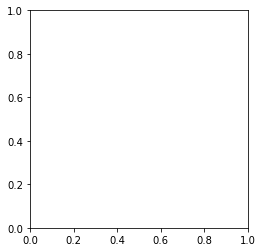

In [9]:
for i_rho, i_theta in maxima:
    print(rho[i_rho], theta[i_theta])
    
    a = np.cos([theta[i_theta]])
    b = np.sin([theta[i_theta]])
    
    y0 = a*rho[i_rho]
    x0 = a*rho[i_rho]
    
    y1 = int(y0 + 1000*(-b))
    x1 = int(x0 + 1000*(a))
    
    y2 = int(y0 - 1000*(-b))
    x2 = int(x0 - 1000*(a))
    
    cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)
    
plt.imshow('hough lines',img)

In [ ]:
rho_peaks = rho[maxima[:,0]]
theta_peaks = theta[maxima[:,1]]

print(rho_peaks, theta_peaks)